<a href="https://colab.research.google.com/github/KevOdhiambo/House-Prices-Prediction-Regression-Modelling/blob/main/Moringa_IP_Week_7_Kevin_Odhiambo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Define The Question
Studying the factors that affect house pirces and build different models that can predict future house prices

#Metric of Success
Find out which model has a higher accuracy 

#Understanding the Contest
Today, globally, especially in Kenya, house prices have contantly been on the rise. But wjat are these factor that contriute to high cost of houses? Well as a data scientist, my work is to work on the house_data dataset, study it and find out which factors have a major impact on house prices.

#Recording the Experiment Design

1. Perfom Data Exploration
2. Perform EDA
3. Build Different Models
4. Coclusion


In [ ]:
#Importing Libraries for our Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split as tts
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#import the dataset house_data
house_data=pd.read_csv('house_data.csv')

In [ ]:
#check the head of the dataset
house_data.head()



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#chec the last five entries from the dataset
house_data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#check the dataset's sshape
house_data.shape

(21613, 20)

The dataset has 21,613 rows/entries and 20 columns

In [ ]:
# check summary description of the dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

#Data Cleaning


In [ ]:
#check for duplicates
house_data.duplicated().sum()

3

There are three duplicates in the dataset, hence i'll remove it.

In [ ]:
#drop duplicates
house_data.drop_duplicates(inplace=True)

#Exploratory Data Analysis

##Univariate Analysis

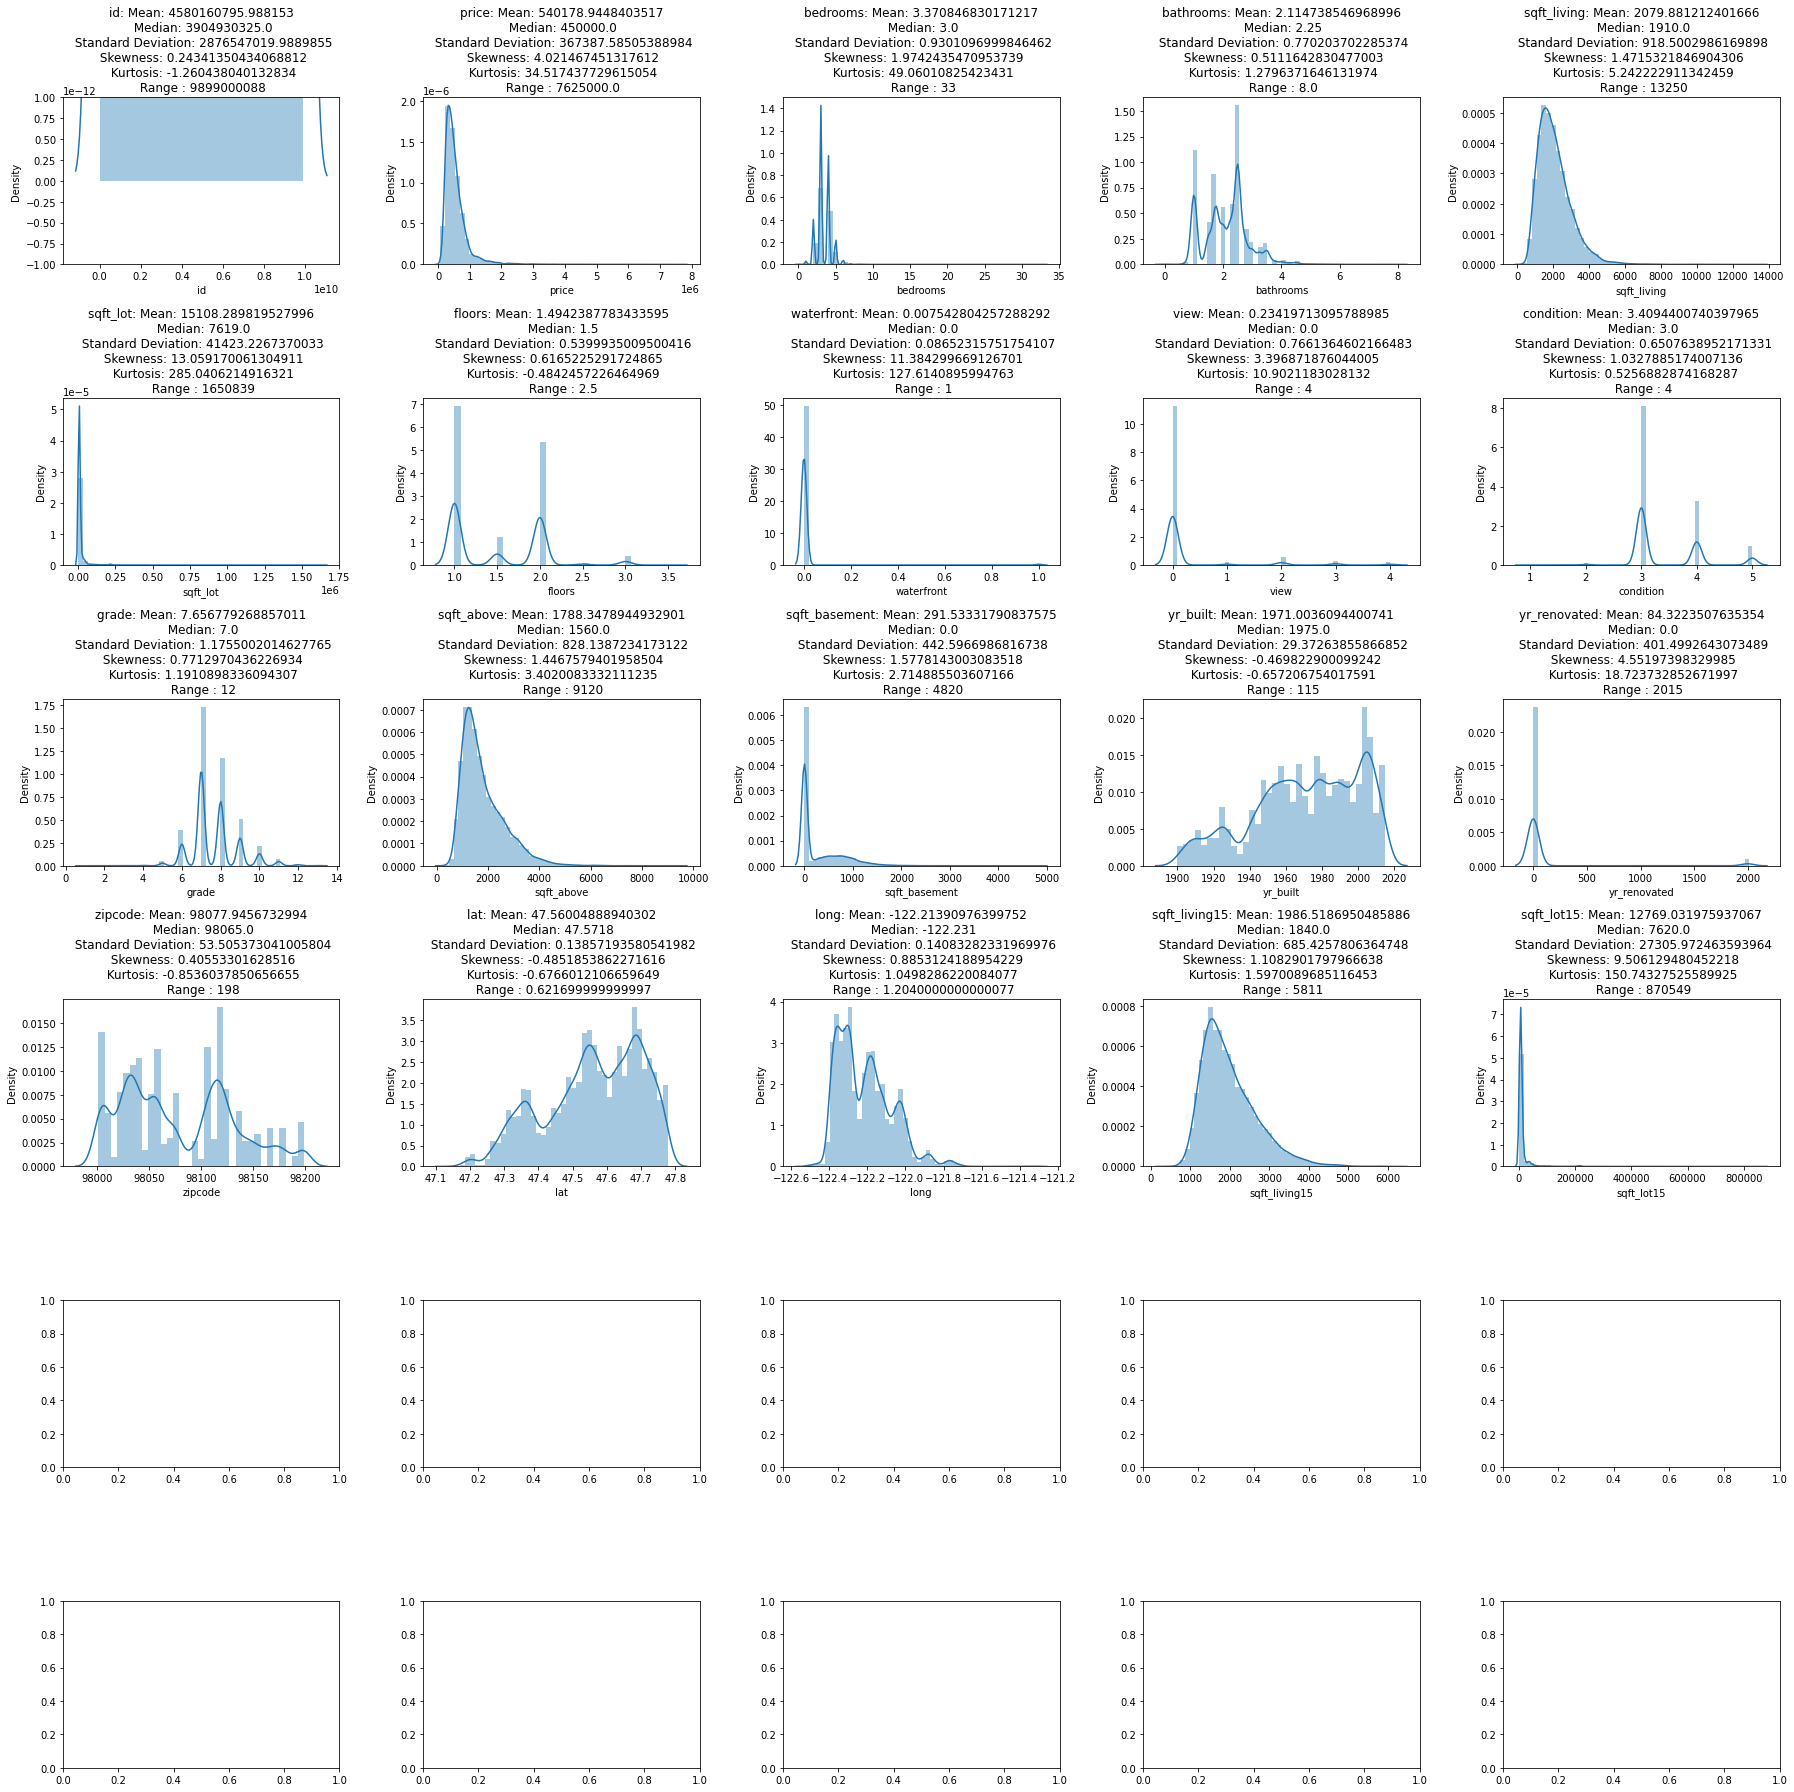

In [ ]:
#plotting summaries of the numerical columns from the dataset
num_var = house_data.select_dtypes(include=['int64','float64']).columns

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(25, 25))

for col, ax in zip(num_var, axes.flatten()):

  mean = house_data[col].mean()
  median = house_data[col].median()
  standard_var = house_data[col].std()
  skew = house_data[col].skew()
  kurt = house_data[col].kurt()
  range = house_data[col].max() - house_data[col].min()

  sns.distplot(house_data[col], hist=True, ax=ax)
  ax.set_title(f'{col}: Mean: {mean}\n Median: {median}\n Standard Deviation: {standard_var}\n Skewness: {skew}\n Kurtosis: {kurt}\n Range : {range}')

plt.tight_layout()

In [ ]:
#getting statistical descriptions of the dataset
house_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21610.0,4.580161e+09,2.876547e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21610.0,5.401789e+05,3.673876e+05,7.500000e+04,3.216125e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21610.0,3.370847e+00,9.301097e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21610.0,2.114739e+00,7.702037e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21610.0,2.079881e+03,9.185003e+02,2.900000e+02,1.425500e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21610.0,1.510829e+04,4.142323e+04,5.200000e+02,5.040000e+03,7.619000e+03,1.068875e+04,1.651359e+06
floors,21610.0,1.494239e+00,5.399935e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21610.0,7.542804e-03,8.652316e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21610.0,2.341971e-01,7.661365e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21610.0,3.409440e+00,6.507639e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


##Bivariate Analysis

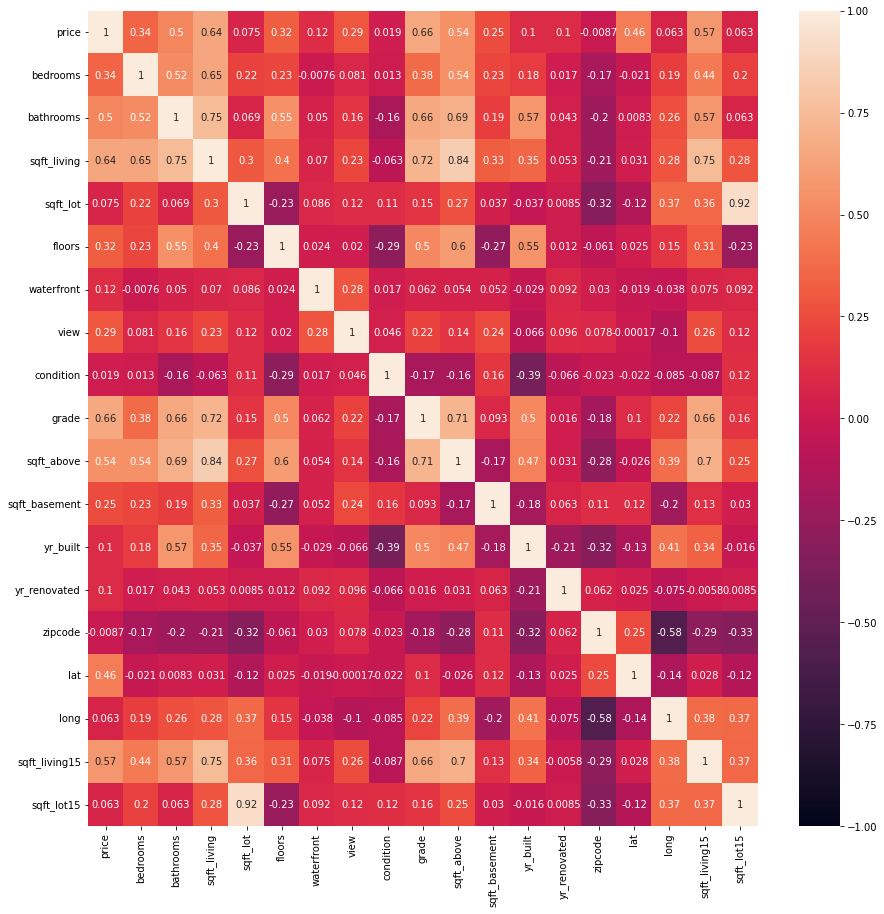

In [ ]:
#checking correlation between teh columns usin a heatmap
correlation = house_data.drop('id', axis=1).corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.show()

The follwoing features have a higher correlation when compare with price.

1. Grade
2. sqft_living
3. sqft_above
4. sqft_living15
5. bathrooms



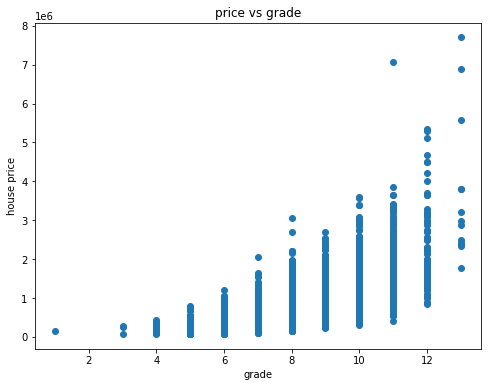

In [ ]:
#Now i'm going to focus on the top 5 features with high effect on house prices.
#investigating the relationship between Grade and Price

plt.figure(figsize=(8,6))
plt.scatter(x=house_data['grade'], y=house_data['price'])
plt.ylabel("house price")
plt.xlabel("grade")
plt.title("price vs grade")
plt.show()

Houses of higher grade have higer prices and vice vesar

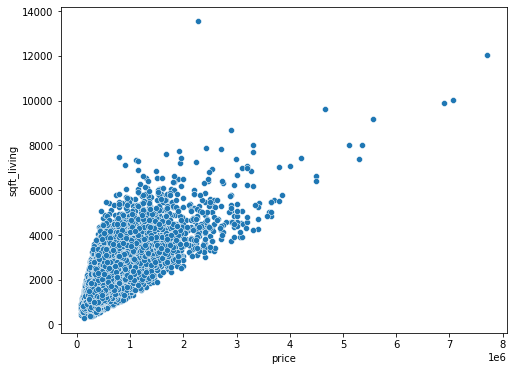

In [ ]:
#investigating sqft_lving and house price

plt.figure(figsize=(8,6))
sns.scatterplot(house_data['price'], house_data['sqft_living'])
plt.show()

houses that has a larger square feet of the living space, attract higher prices

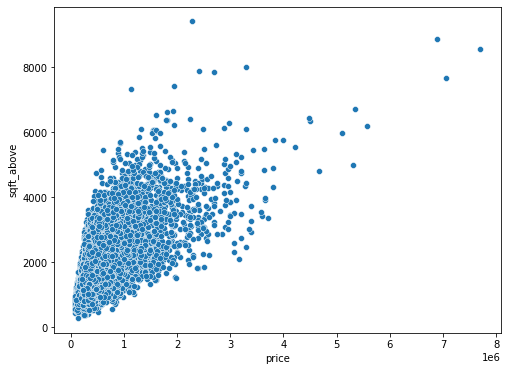

In [ ]:
#investigating the sqft_above and house price
plt.figure(figsize=(8,6))
sns.scatterplot(house_data['price'], house_data['sqft_above'])
plt.show()

Houses with a larger space above(up stairs) attract higher prices.

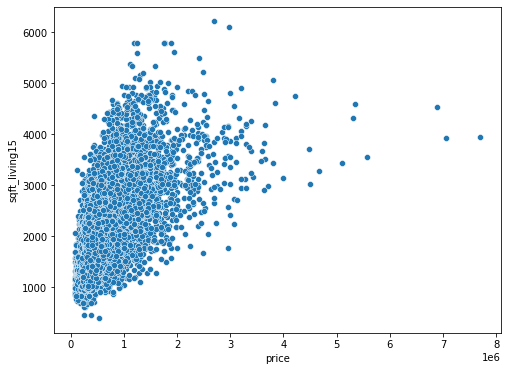

In [ ]:
#investigating the sqft_living15 and house price
plt.figure(figsize=(8,6))
sns.scatterplot(house_data['price'], house_data['sqft_living15'])
plt.show()


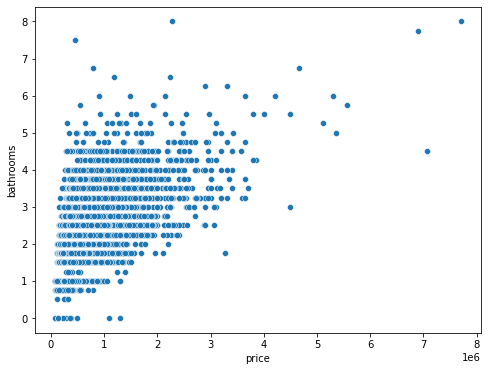

In [ ]:
##investigating bathroom number and house price
plt.figure(figsize=(8,6))
sns.scatterplot(house_data['price'], house_data['bathrooms'])
plt.show()

Houses wit fewer bathrooms command low prices as compared to houses with mpore bathrooms.

#Multicolinearity

In [ ]:
#Now, before checking for multicollinearity
#i irst make a copy of my dataset
#drop columns that are not necessary for my analysis
#check for multicoleneairty and later on build my models.

df_house=house_data.copy()
df_house.sample(5)



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6034,6926700660,680000.0,2,2.00,1450,989,3.0,0,0,3,9,1450,0,2014,0,98109,47.6354,-122.346,1490,1240
17213,7696630080,197000.0,3,1.75,1690,7735,1.0,0,0,4,7,1060,630,1976,0,98001,47.3324,-122.280,1580,7503
17702,3438502290,616750.0,3,1.50,2140,47743,1.5,0,0,3,9,2140,0,1978,0,98106,47.5402,-122.365,1060,6016
6860,2475200290,332544.0,2,1.75,1710,4187,1.0,0,0,3,7,1710,0,1987,0,98055,47.4732,-122.188,1760,4084
15839,3964400470,500000.0,3,1.50,2150,4000,1.5,0,0,3,7,1470,680,1928,0,98144,47.5733,-122.312,1750,4000


In [ ]:
#drop columns i dont need
drop=['id','lat','zipcode','long','yr_built','yr_renovated','sqft_lot']
df_house1 = df_house.drop(drop, axis=1)

In [ ]:
#check my new dataset
df_house1.head(5)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680,0,1800,7503


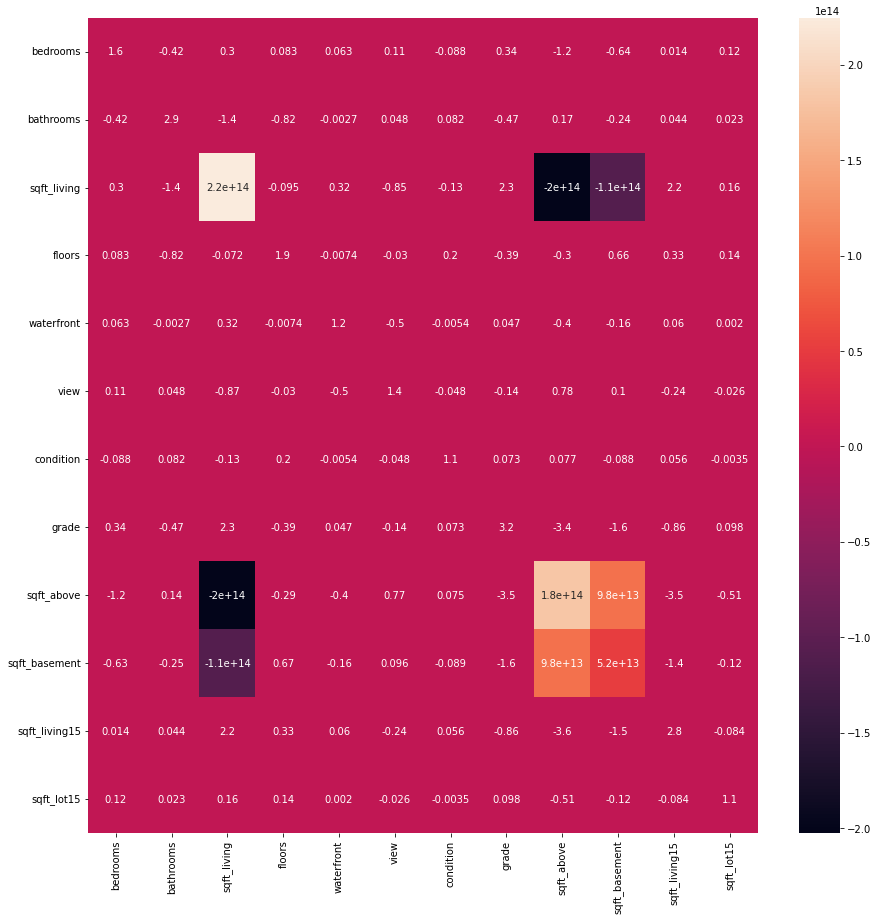

In [ ]:
#check for VIF variance inflation factor using a correlation matrix
vif_matrix = df_house1.drop('price', axis=1).corr()
vif = pd.DataFrame(np.linalg.inv(vif_matrix), index=vif_matrix.index, columns=vif_matrix.columns)
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

From my matrix, sqft_bassement and sqft_above and sqft_above and sqft_basement has a hiher variance inflation factor. Therefore, i'm going to drop them.

In [ ]:
#dropping sqft_above and sqft_bbasement
df_house1.drop(['sqft_above','sqft_basement'], axis=1, inplace=True)


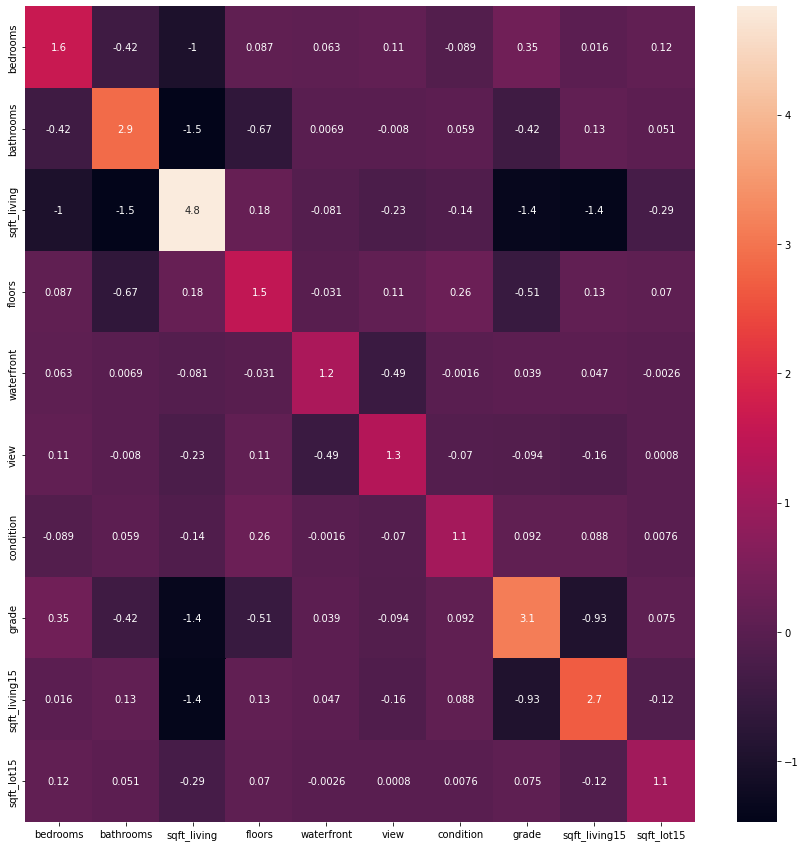

In [ ]:
# Checking the variance inflation factor after dropping those columns with extreme VIF
vif_matrix = df_house1.drop('price', axis=1).corr()
vif = pd.DataFrame(np.linalg.inv(vif_matrix), index=vif_matrix.index, columns=vif_matrix.columns)
plt.figure(figsize=(15,15))
sns.heatmap(vif, annot=True)
plt.show()

#Regression

##Multiple Linear Regression

In [ ]:
#i'll start off by importing the required libraries
from scipy.stats import bartlett, chi2
from sklearn.metrics import mean_squared_error


In [ ]:
#create independent variables for using in our model
X = df_house1.drop('price', axis=1)
Y = df_house1['price']

#Split the data
# 30% is for testing which 70% is for training the dataset
x_train, x_test, y_train, y_test = tts(X, Y, test_size=.3, random_state=24)

In [ ]:
#scalling my features using RobustScaler
dummy_variables=['view','waterfront']

sc = RobustScaler().fit(x_train.drop(dummy_variables, axis=1))
num_train = sc.transform(x_train.drop(dummy_variables, axis=1))
x_train = np.concatenate((num_train, x_train[dummy_variables].to_numpy()), axis=1)

num_test = sc.transform(x_test.drop(dummy_variables, axis=1))
x_test = np.concatenate((num_test, x_test[dummy_variables].to_numpy()), axis=1)

In [ ]:
# Perform Linear regression

linreg = LinearRegression()
linreg.fit(x_train, y_train)
linpred = linreg.predict(x_test)

residuals = np.subtract(linpred, y_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test,linpred)))
print('R2: ', linreg.score(x_test, y_test))

RMSE:  229004.1113914753
R2:  0.5818892540201784


In [ ]:
#print out coefficients for each variables in my dataset
column_names = X.drop(dummy_variables,axis=1).columns.to_list()
column_names.extend(dummy_variables)
coefficients = dict(zip(column_names, linreg.coef_))

sort_coefficients = sorted(coefficients.items(), key=lambda x: x[1])

for i in sort_coefficients:
	print(i[0], i[1])

bedrooms -39030.67094891088
floors -14221.513247822775
bathrooms -12550.958392420434
sqft_lot15 -3945.31334934559
sqft_living15 5062.858415808318
condition 55380.519400316574
view 64551.885545257435
grade 97815.9765521927
sqft_living 231130.28819838242
waterfront 640923.8403532017


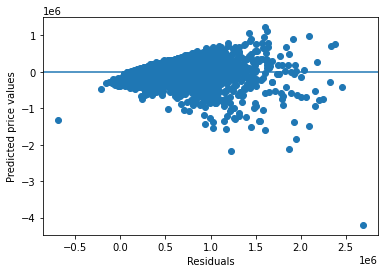

In [ ]:
# residual plot showing the predicted price values
plt.scatter(linpred, residuals)
plt.xlabel('Residuals')
plt.ylabel('Predicted price values')
plt.axhline(residuals.mean())

In [ ]:
#Barlette test of variance 
test_result, p_value = bartlett(linpred, residuals)

# Computing a critical value of the chi squared distribution
degree_of_freedom = len(linpred)-1
probability = 1 - p_value

critical_value = chi2.ppf(probability, degree_of_freedom)
print(critical_value, test_result, p_value)

if (test_result > critical_value):
  print('variances are unequal, and the model should be reassessed')
else:
  print('variances are homogeneous')

inf 336.1525981120845 4.3931913575674235e-75
variances are homogeneous


There are several critical points in the data as the computed crtical value is infinite. From the multicollinearity test, some varibales are correlated which coul have an impact on the model.

##Ridge Regration

In [ ]:
#because of multicollenearity, i used ridge regression for further analysis

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X = df_house1.drop(['price'], axis=1)
Y = df_house1['price']

# Split data
x_train, x_test, y_train, y_test = tts(X, Y, test_size=.3, random_state=24)

In [ ]:
#Scale features for the model
sc = RobustScaler().fit(x_train.drop(dummy_variables, axis=1))
num_train = sc.transform(x_train.drop(dummy_variables, axis=1))
x_train = np.concatenate((num_train, x_train[dummy_variables].to_numpy()), axis=1)

num_test = sc.transform(x_test.drop(dummy_variables, axis=1))
x_test = np.concatenate((num_test, x_test[dummy_variables].to_numpy()), axis=1)

In [ ]:
# get the potential alpha values
alpha_val = np.logspace(-5,3,10)
ridgereg = Ridge()

grid_ridge = GridSearchCV(ridgereg, param_grid={'alpha':alpha_val}, scoring='neg_mean_squared_error', cv=10, refit=True)

In [ ]:
# best score?
grid_ridge.fit(x_train, y_train)
print(grid_ridge.best_params_,  np.sqrt(abs(grid_ridge.best_score_)))

{'alpha': 0.2782559402207126} 231907.85019548095


Interams of perfomance, there is a drop in perfomance.

In [ ]:
ridgereg = Ridge(alpha=0.2782559402207126).fit(x_train,y_train)

In [ ]:
#get our R2 Score
ridgereg.score(x_test,y_test)

0.5819287473135353

There is a relativel similar perfomance from the ridge reression and linear regression model.

In [ ]:
#check out coefficients for each variale
column_names = X.drop(dummy_variables,axis=1).columns.to_list()
column_names.extend(dummy_variables)
dict(zip(column_names, ridgereg.coef_))

sort_coefficients = sorted(coefficients.items(), key=lambda x: x[1])

for i in sort_coefficients:
	print(i[0], i[1])

bedrooms -39030.67094891088
floors -14221.513247822775
bathrooms -12550.958392420434
sqft_lot15 -3945.31334934559
sqft_living15 5062.858415808318
condition 55380.519400316574
view 64551.885545257435
grade 97815.9765521927
sqft_living 231130.28819838242
waterfront 640923.8403532017


The coeficeints from Ridge reression and almost iedntical to those from Linear regression model

##Lasso Regression

In [ ]:
#Lasso regression shall bring out some of the most vital variable features and also it perfoms well compared to Ridge and Linear regression
from sklearn.linear_model import Lasso

lassoreg = Lasso()
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
grid_lasso = GridSearchCV(lassoreg, parameters, scoring ='r2') 

In [ ]:
#get my alpha values
grid_lasso.fit(x_train, y_train)
print(grid_lasso.best_params_, grid_lasso.best_score_)

{'alpha': 24.0} 0.6119591803756314


In [ ]:
# Train Lasso regressor
grid_lasso = Lasso(alpha=0.1)
grid_lasso.fit(x_train, y_train)
print(grid_lasso.score(x_test, y_test))
print( np.sqrt(mean_squared_error(y_test,grid_lasso.predict(x_test))))

0.5818896497801734
229004.0030102769


The perfomance of Lasso regression (58.19%) is also similar to that of Ridge and Multiple linear regression models.

In [ ]:
#print out coefficients for each features
column_names = X.drop(dummy_variables,axis=1).columns.to_list()
column_names.extend(dummy_variables)
dict(zip(column_names, grid_lasso.coef_))

sort_coefficients = sorted(coefficients.items(), key=lambda x: x[1])

for i in sort_coefficients:
	print(i[0], i[1])

bedrooms -39030.67094891088
floors -14221.513247822775
bathrooms -12550.958392420434
sqft_lot15 -3945.31334934559
sqft_living15 5062.858415808318
condition 55380.519400316574
view 64551.885545257435
grade 97815.9765521927
sqft_living 231130.28819838242
waterfront 640923.8403532017


The coeficeints from Lasso regression model are similar to those from Ridge, and multiple reression models. 

##Elastic Net Reression

In [ ]:
from sklearn.linear_model import ElasticNet

#set X and Y variables
X = df_house1.drop(['price'], axis=1)
Y = df_house1['price']

# Split data
x_train, x_test, y_train, y_test = tts(X, Y, test_size=.2, random_state=24)

In [ ]:
#determine the best alpha
elastic=ElasticNet(normalize=True)
grid_elastic = GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='r2',n_jobs=1,refit=True,cv=10)

In [ ]:
grid_elastic.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(normalize=True), n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             scoring='r2')

In [ ]:
# print best alpha
grid_elastic.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [ ]:
# best score
grid_elastic.best_score_

0.6046255258622353

In [ ]:
elastic_reg = ElasticNet(alpha=1e-05, l1_ratio=0.8).fit(x_train, y_train)
print(f'R2: {elastic_reg.score(x_test, y_test)}')

R2: 0.5959787246493591


There is a sligt improvemnet from 58% to 60% in terams of perfomamnces in my model

In [ ]:
#print coefficients for each features
column_names = X.columns.to_list()
coefficients = dict(zip(column_names, elastic_reg.coef_))

sort_coefficients = sorted(coefficients.items(), key=lambda x: x[1])

for i in sort_coefficients:
	print(i[0], i[1])

bedrooms -35337.42191384273
floors -13834.867957109827
bathrooms -11966.05434125794
sqft_lot15 -0.7640215741885421
sqft_living15 3.8221063823529726
sqft_living 200.448768094651
condition 55572.382634874084
view 62733.69594435548
grade 99233.17725128512
waterfront 598826.4440965339


Some coeeficient features have been reduced(waterfront, sqft_living15,sqft_living) which means an imporvemnt on perfomance of the model

##Quantile Regression

most of te features exhibit multicollenearity, as such i'm going to use a more suitable regression model to handle the collenarity.

In [ ]:
#Import my scaling feature normalization
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#set x and y
X = df_house1.drop('price', axis=1)
Y = df_house1['price']

# Split data
x_train, x_test, y_train, y_test = tts(X, Y, test_size=.3, random_state=45)

In [ ]:
#Scale features
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_frame = pd.DataFrame(x_train, columns=X.columns)
y_frame = pd.DataFrame({'y': y_train})

x_frame.index =  pd.RangeIndex(len(x_frame.index))
y_frame.index = pd.RangeIndex(len(y_frame.index))

df = pd.concat([x_frame, y_frame], axis=1)

In [ ]:
#view my dataframe
df

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_living15,sqft_lot15,y
0,0.121212,0.31250,0.140578,0.0,0.0,0.0,1.00,0.333333,0.268628,0.017124,544500.0
1,0.060606,0.31250,0.139818,0.4,0.0,0.0,0.50,0.555556,0.253141,0.005981,1430000.0
2,0.121212,0.31250,0.181611,0.4,0.0,0.0,0.50,0.555556,0.408019,0.008522,438800.0
3,0.090909,0.28125,0.089058,0.4,0.0,0.0,0.50,0.333333,0.219928,0.005266,282000.0
4,0.121212,0.28125,0.148936,0.0,0.0,0.0,0.75,0.444444,0.334022,0.191524,404950.0
...,...,...,...,...,...,...,...,...,...,...,...
15122,0.151515,0.31250,0.153495,0.4,0.0,0.0,0.50,0.333333,0.254861,0.006550,338000.0
15123,0.060606,0.12500,0.080547,0.0,0.0,0.5,0.50,0.333333,0.270349,0.011570,500000.0
15124,0.060606,0.12500,0.059271,0.2,0.0,0.0,0.75,0.333333,0.122354,0.012231,312000.0
15125,0.121212,0.34375,0.213526,0.4,0.0,0.0,0.50,0.555556,0.488900,0.011572,587000.0


In [ ]:
# define quantiles
quantiles = np.arange(0.1, 1.0, 0.1)
mod = smf.quantreg('y ~ bedrooms + bathrooms +	sqft_living +	floors +	waterfront +	view +	condition +	grade	+  sqft_living15 +	sqft_lot15', df)

for qt in quantiles:
  res = mod.fit(qt)
  print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2353
Model:                       QuantReg   Bandwidth:                   2.781e+04
Method:                 Least Squares   Sparsity:                    4.703e+05
Date:                Sun, 12 Jun 2022   No. Observations:                15127
Time:                        20:09:03   Df Residuals:                    15116
                                        Df Model:                           10
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -3.6e+04   6956.976     -5.175      0.000   -4.96e+04   -2.24e+04
bedrooms       -5.01e+05   4.66e+04    -10.742      0.000   -5.92e+05    -4.1e+05
bathrooms      3.814e+04   1.84e+04      2.069      0.039    1998.630    7.43e+04
sqft_living    9.486e+05   3.37e+04  

In [ ]:
# get predictions for the .3 percentile
mod_30 = smf.quantregmod = smf.quantreg('y ~ bedrooms + bathrooms +	sqft_living +	floors +	waterfront +	view +	condition +	grade	+  sqft_living15 +	sqft_lot15', df)
res = mod_30.fit(.3)

parameters_30 = [res.params[x] for x in X.columns]

In [ ]:
x_test_30 = pd.DataFrame(x_test, columns=X.columns)
x_test_30.index =  pd.RangeIndex(len(x_test_30.index))

In [ ]:
for i, col in enumerate(X.columns.to_list()):
  x_test_30[col] = parameters_30[i] * x_test_30[col]

In [ ]:
x_test_30['y_pred'] = x_test_30.sum(axis=1)

In [ ]:
# get the rmse score
np.sqrt(mean_squared_error(y_test, x_test_30['y_pred'].values))

236290.3034454762

The RMSE score of the .3 percentile is higher than Ridge(231907), Lasso(229004) and Multiple  linear Regression(229004)

#Conclusion

1. Elastic Net Regression perfomed better for our model compared to te oter regression models with the r2 score being 60%.
2. Elastic Net Regression also best suits our data because of the multiple multicollenearity

#Recommendation

To attain further accuracy from the models, maybe removal of outliers from the data might help boost the scores.